In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scifit.solvers import FitSolver1D

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [3]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, s, scale):
        return stats.lognorm.pdf(x[:, 0], s=s, loc=0., scale=scale)

In [4]:
model = Model()

In [5]:
#x = np.logspace(-3, 5, 50, base=10).reshape(-1, 1)
x = np.logspace(-1, 2.5, 50, base=10).reshape(-1, 1)

In [6]:
data = model.synthetic_dataset(xdata=x, sigma=3e-2, scale_mode="rel", generator=np.random.uniform, parameters=(0.7, 17.))

In [7]:
sol = model.fit(data, p0=[0.5, 10])

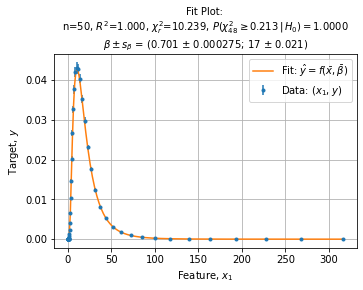

In [21]:
axe = model.plot_fit()
axe.figure.savefig("figures/Linearizable/LogNormFit.pdf")

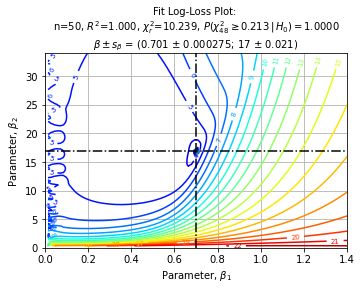

In [25]:
axe = model.plot_loss(log_loss=True, factor=10, levels=20)
axe.figure.savefig("figures/Linearizable/LogNormLoss.pdf")

In [10]:
X = data.x0.values.reshape(-1, 1)
y = data.y.values

In [11]:
poly = PolynomialFeatures(2)
linreg = LinearRegression(fit_intercept=False)
#pipe = make_pipeline(poly, linreg)

In [12]:
pipeline = Pipeline([
    ("transformer", FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True)),
    ("polynomial", PolynomialFeatures(2)),
    (
        "regressor", TransformedTargetRegressor(
            regressor=LinearRegression(fit_intercept=False),
            func=np.log, inverse_func=np.exp
        )
    )
])

In [13]:
pipeline.fit(X, y)
pipeline.score(X, y)

0.9992362733555484

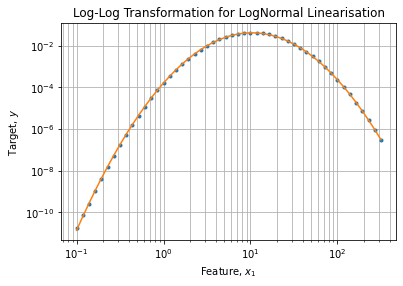

In [27]:
fig, axe = plt.subplots()
axe.loglog(X, y, linestyle="none", marker=".")
axe.loglog(X, pipeline.predict(X))
axe.set_title("Log-Log Transformation for LogNormal Linearisation")
axe.set_xlabel(r"Feature, $x_1$")
axe.set_ylabel(r"Target, $y$")
axe.grid(which="both")
axe.figure.savefig("figures/Linearizable/LogNormLinearization.pdf")

In [15]:
b0, b1, b2 = pipeline.steps[2][1].regressor_.coef_

In [16]:
pipeline.steps[2][1].regressor_.coef_

array([-8.71791093,  4.75081996, -1.01463865])

In [17]:
s = np.sqrt(-0.5/b2)
m = s**2*(b1 + 1)
np.exp(m), s

(17.012104638157666, 0.7019873732363541)